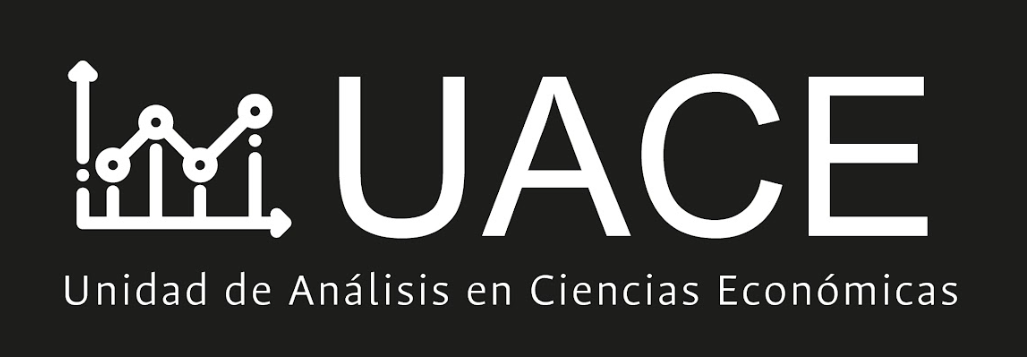

# **BIENVENIDOS AL CURSO DE MACHINE LEARNING EN PYTHON**

## **Unidad de Análisis en Ciencias Económicas - UACE**

### Monitores:


### Correos: 
 

### Primer Ciclo: 2023-II

# **Sesión 1**
1. Historia del Machine Learning.


2. Introducción al Machine Learning.


3. Repaso: 
* Análisis exploratorio de datos
* Transformación y limpieza de datos. 




# **1. Historia del Machine Learning**

Los inicios del aprendizaje automático o machine learning se remontan a los años 50 donde Alan Turing en su obra “Computing Machinery and Intelligence” propone la Prueba/Test de Turing con el objetivo de poner a prueba si las respuestas 

https://www.becas-santander.com/es/blog/test-de-turing.html

# **2. Introducción al Machine Learning**

# **3. Repaso**

## Regresión de Mínimos Cuadrados en Machine Learning
---

Regresión de Mínimos Cuadrados en Machine Learning
La regresión de mínimos cuadrados es una técnica muy común en Machine Learning para ajustar un modelo lineal a un conjunto de datos. En esta técnica, se busca encontrar los valores de los parámetros del modelo que minimizan la suma de los errores al cuadrado entre las predicciones del modelo y los valores reales del conjunto de datos. Esta técnica es especialmente útil cuando se trata de ajustar un modelo a un conjunto de datos con ruido.
La fórmula del modelo de regresión lineal es:
$$
y=X w+\epsilon
$$
Donde:
- $\ y $ es el vector de variables dependientes o respuesta.
- $\ X $ es la matriz de variables independientes o predictores.
- $\ w $ es el vector de parámetros a estimar.
- $\epsilon $ es el vector de errores aleatorios.
La solución de mínimos cuadrados para estimar \$w\$ se obtiene como:
$$
w=\left(X^T X\right)^1 X^T y
$$
Donde:
- $ X^{\wedge} T $ es la matriz traspuesta de $\$ X \$$.
- $\left(X^{\wedge} T X\right)^{\wedge}\{-1\} $ es la inversa de la matriz $\$ X^{\wedge} T X \$$.
La raíz del error cuadrático medio (RMSE) se define como:
$$
R M S E=\sqrt{\frac{1}{n} \sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2}
$$
Donde:
- $ n $ es el número de observaciones.
- \$y_i\$ es el valor real de la respuesta en la observación \$i\$.
- \$\hat\{y_i\}\$ es el valor predicho de la respuesta en la observación $i$.

El error cuadrático medio de la regresión de mínimos cuadrados es: 9.82


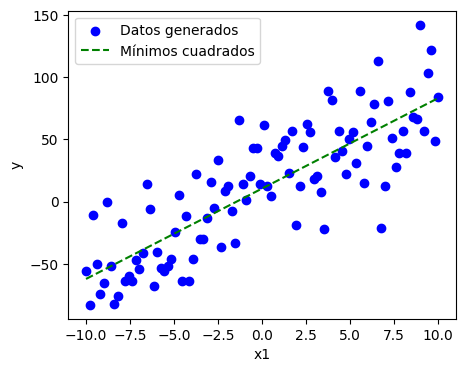

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def RMSE(y_true, y_pred):
    """Calcula el error cuadrático medio."""
    return np.sqrt(((y_true - y_pred) ** 2).mean())


def DATA(w=None, n=100, noise=0):
    """Genera datos aleatorios para la regresión de mínimos cuadrados."""
    x1 = np.linspace(-10, 10, num=n)
    x2 = np.random.normal(x1, 5)
    X = np.array([np.ones(len(x1)), x1, x2])
    w = np.array(w)
    y = w.dot(X) + np.random.normal(0, noise, size=n)
    return X, y


def OLS(X, y):
    """Realiza la regresión de mínimos cuadrados."""
    w = np.linalg.inv(X @ X.T) @ X @ y
    return w


def PLOT(X, y, w_true, w_ls):
    x1 = np.linspace(-10, 10, num=100)
    X_ = np.array([np.ones(len(x1)), x1, x1])
    w_true = np.array(w_true)  # convierte a numpy array
    y_true = w_true.dot(X_)
    y_ls = w_ls.dot(X_)

    fig, ax = plt.subplots(figsize=(5, 4))
    ax.scatter(X[1], y, c="b", marker="o", label="Datos generados")
    ax.plot(x1, y_ls, "--", c="g", label="Mínimos cuadrados")
    ax.set_xlabel("x1")
    ax.set_ylabel("y")
    ax.legend()


w_true = [10, 2, 5]
noise = 10
X, y = DATA(w=w_true, n=100, noise=noise)
w_ls = OLS(X, y)

y_pred = w_ls.dot(X)
rmse = RMSE(y, y_pred)

PLOT(X, y, w_true, w_ls)

print(f"El error cuadrático medio de la regresión de mínimos cuadrados es: {rmse:.2f}")




## 3.1. Predeccion precios de casas en Boston


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy import stats
from scipy.stats import skew, norm
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p

from collections import Counter

In [3]:
avocado_data ='https://raw.githubusercontent.com/bgarzonm/UACE/main/housing.csv'
df = pd.read_csv(avocado_data)
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Exploratory Data Analysis (EDA)

Cada registro en la base de datos describe un suburbio o pueblo de Boston. Los datos fueron extraídos del Área Estadística Metropolitana Estándar de Boston (SMSA) en 1970. Los atributos se definen de la siguiente manera (tomado del Repositorio de Aprendizaje Automático UCI1):

- `crim:` tasa de criminalidad per cápita por pueblo ``

- `zn:` proporción de tierra residencial zonificada para lotes de más de 25,000 pies cuadrados

- `indus:` proporción de acres de negocios no minoristas por pueblo

- `chas:` variable ficticia del río Charles (= 1 si el tramo limita con el río; 0 en caso contrario)

- `nox:` concentración de óxidos nítricos (partes por cada 10 millones)

- `rm:` número promedio de habitaciones por vivienda

- `age:` proporción de unidades ocupadas por sus propietarios construidas antes de 1940

- `dis:` distancias ponderadas a cinco centros de empleo de Boston

- `rad:` índice de accesibilidad a carreteras radiales

- `tax:` tasa de impuesto a la propiedad de valor total por cada 10,000 USD

- `ptratio:` relación alumno-profesor por pueblo

- `black:` 1000(Bk - 0.63) ^ 2 donde Bk es la proporción de personas negras por ciudad

- `lstat:` porcentaje de la población de estatus inferior

- `medv:` valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [5]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
 df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

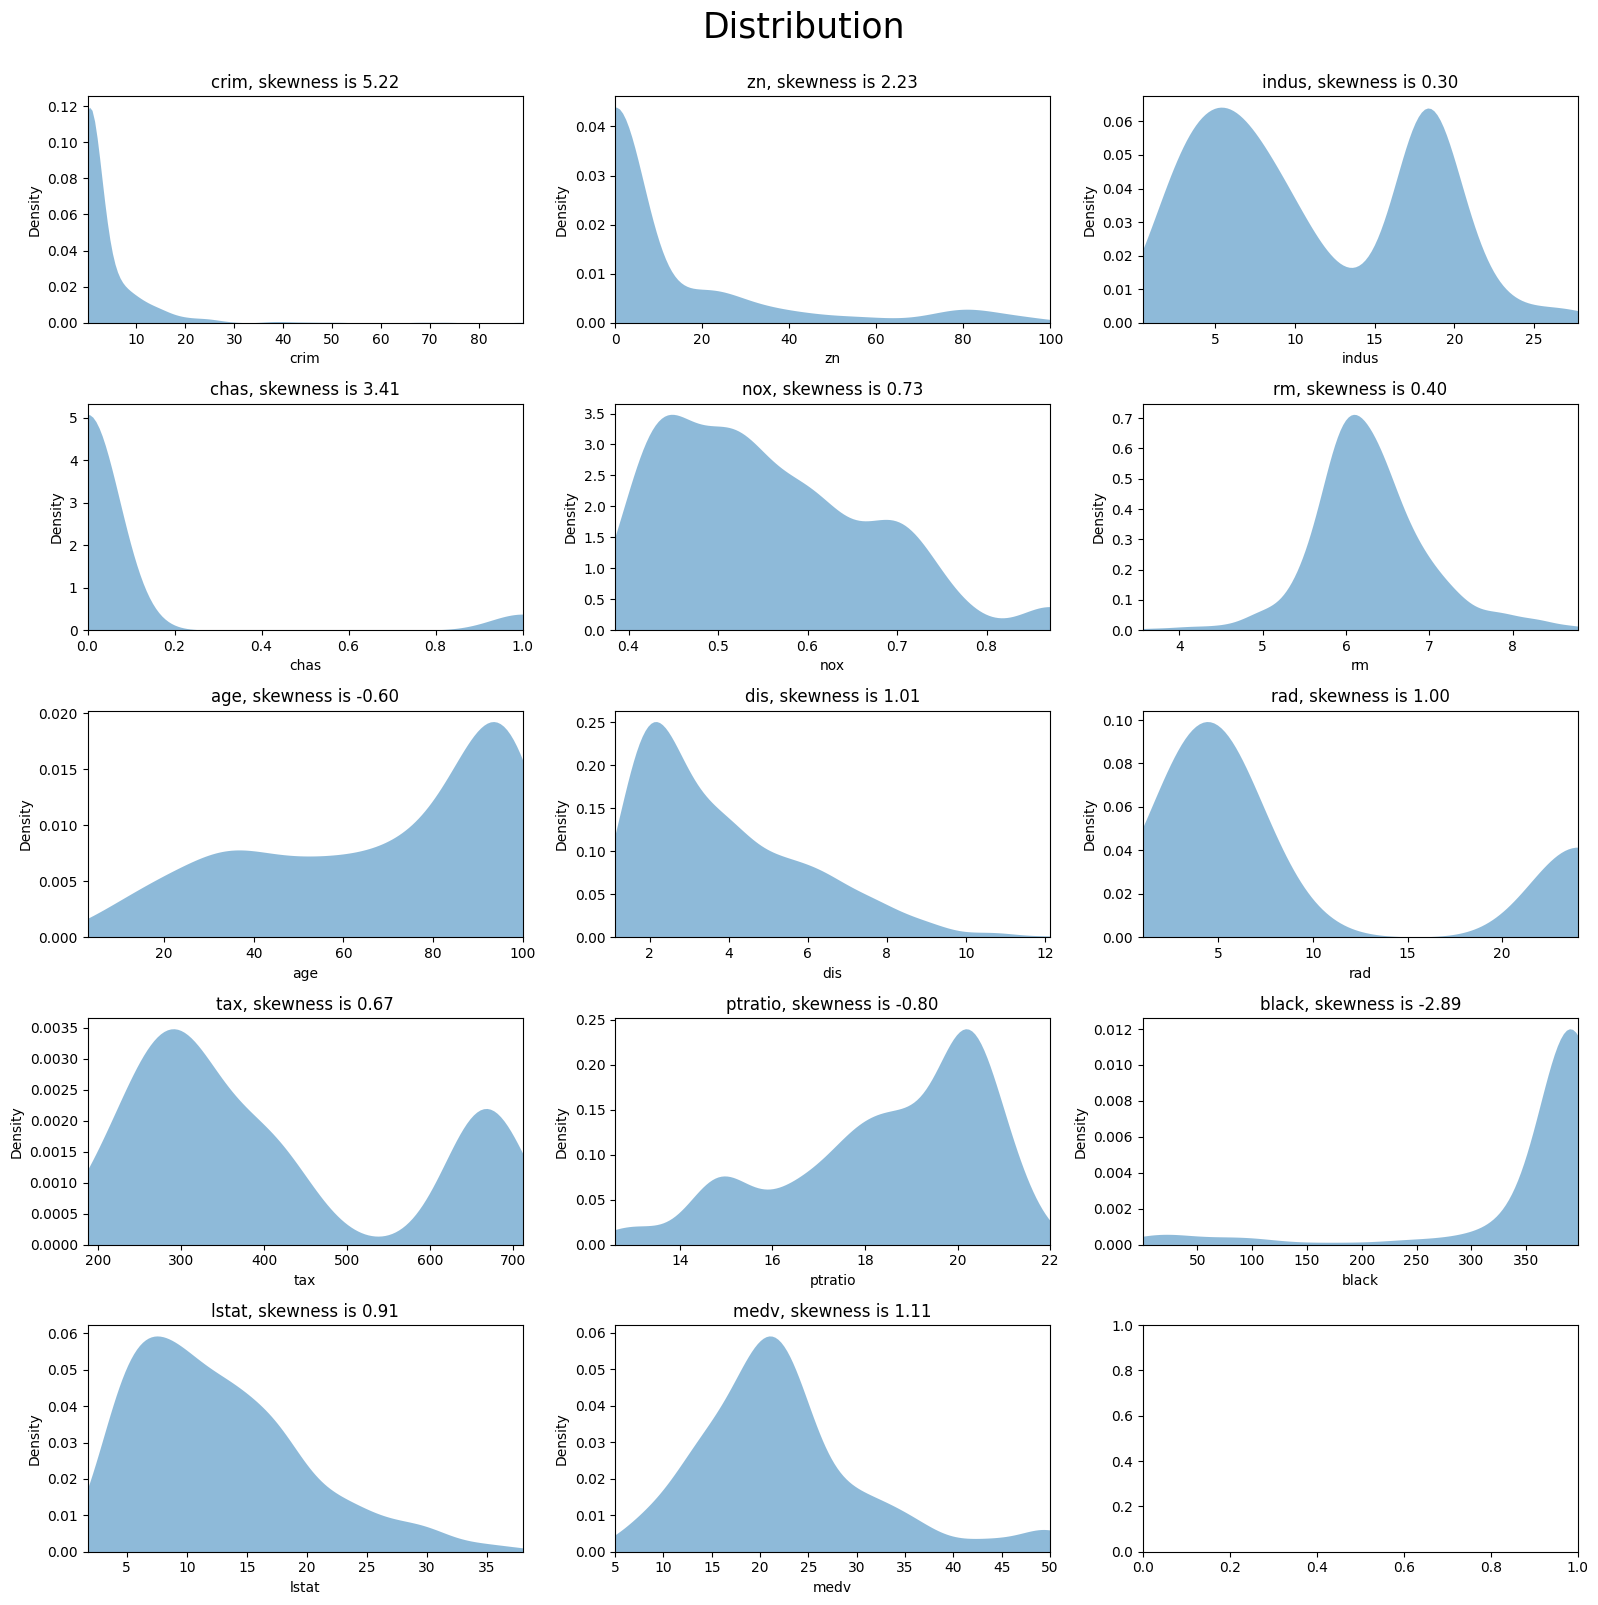

In [7]:
def distribution(
    dataset: pd.DataFrame,
    columns_list: list[str],
    rows: int = 4,
    cols: int = 3,
    suptitle: str = 'Distribution'
) -> tuple[plt.Figure, list[plt.Axes]]:
    fig, axs = plt.subplots(rows, cols, figsize=(16, 16))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    for i, column in enumerate(columns_list):
        if i >= rows * cols:
            break
        ax = axs[i]
        sns.kdeplot(dataset[column], ax=ax, fill=True, alpha=.5, linewidth=0)
        ax.set_title(f'{column}, skewness is {dataset[column].skew(axis=0, skipna=True):.2f}')
        ax.set_xlim(dataset[column].min(), dataset[column].max())
    plt.tight_layout()
    return fig, axs

columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
           'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']
fig, axs = distribution(dataset=df, columns_list=columns, rows=5, cols=3, suptitle='Distribution')


## Procesamiento de datos

- Detectar y eliminar valores atípicos en variables numéricas 
- Ingeniería de variables
- Transformación de datos
- Codificación de variables
- Selección de variables

### Detectar y eliminar valores atípicos en variables numéricas

In [8]:
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers


In [9]:
outliers = detect_outliers(df, 2, ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
                                          'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'])
len(outliers)

15

In [10]:
df = df.drop(outliers, axis = 0).reset_index(drop = True)

### Ingeniería de variables

In [11]:
nivel_impuesto = ['1' if value <= np.median(df['tax']) else '2' for value in df['tax']]
df['nivel_impuesto'] = nivel_impuesto

### Transformación de datos

In [12]:
numeric_dtypes = ["int16", "int32", "int64", "float16", "float32", "float64"]
numeric = []
for i in df.columns:
    if df[i].dtype in numeric_dtypes:
        numeric.append(i)

skew_features = (
    df[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)
)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
print(f'Existen {len(skew_index)} variables con una kurtosis mayor 0.5')



Existen 9 variables con una kurtosis mayor 0.5


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


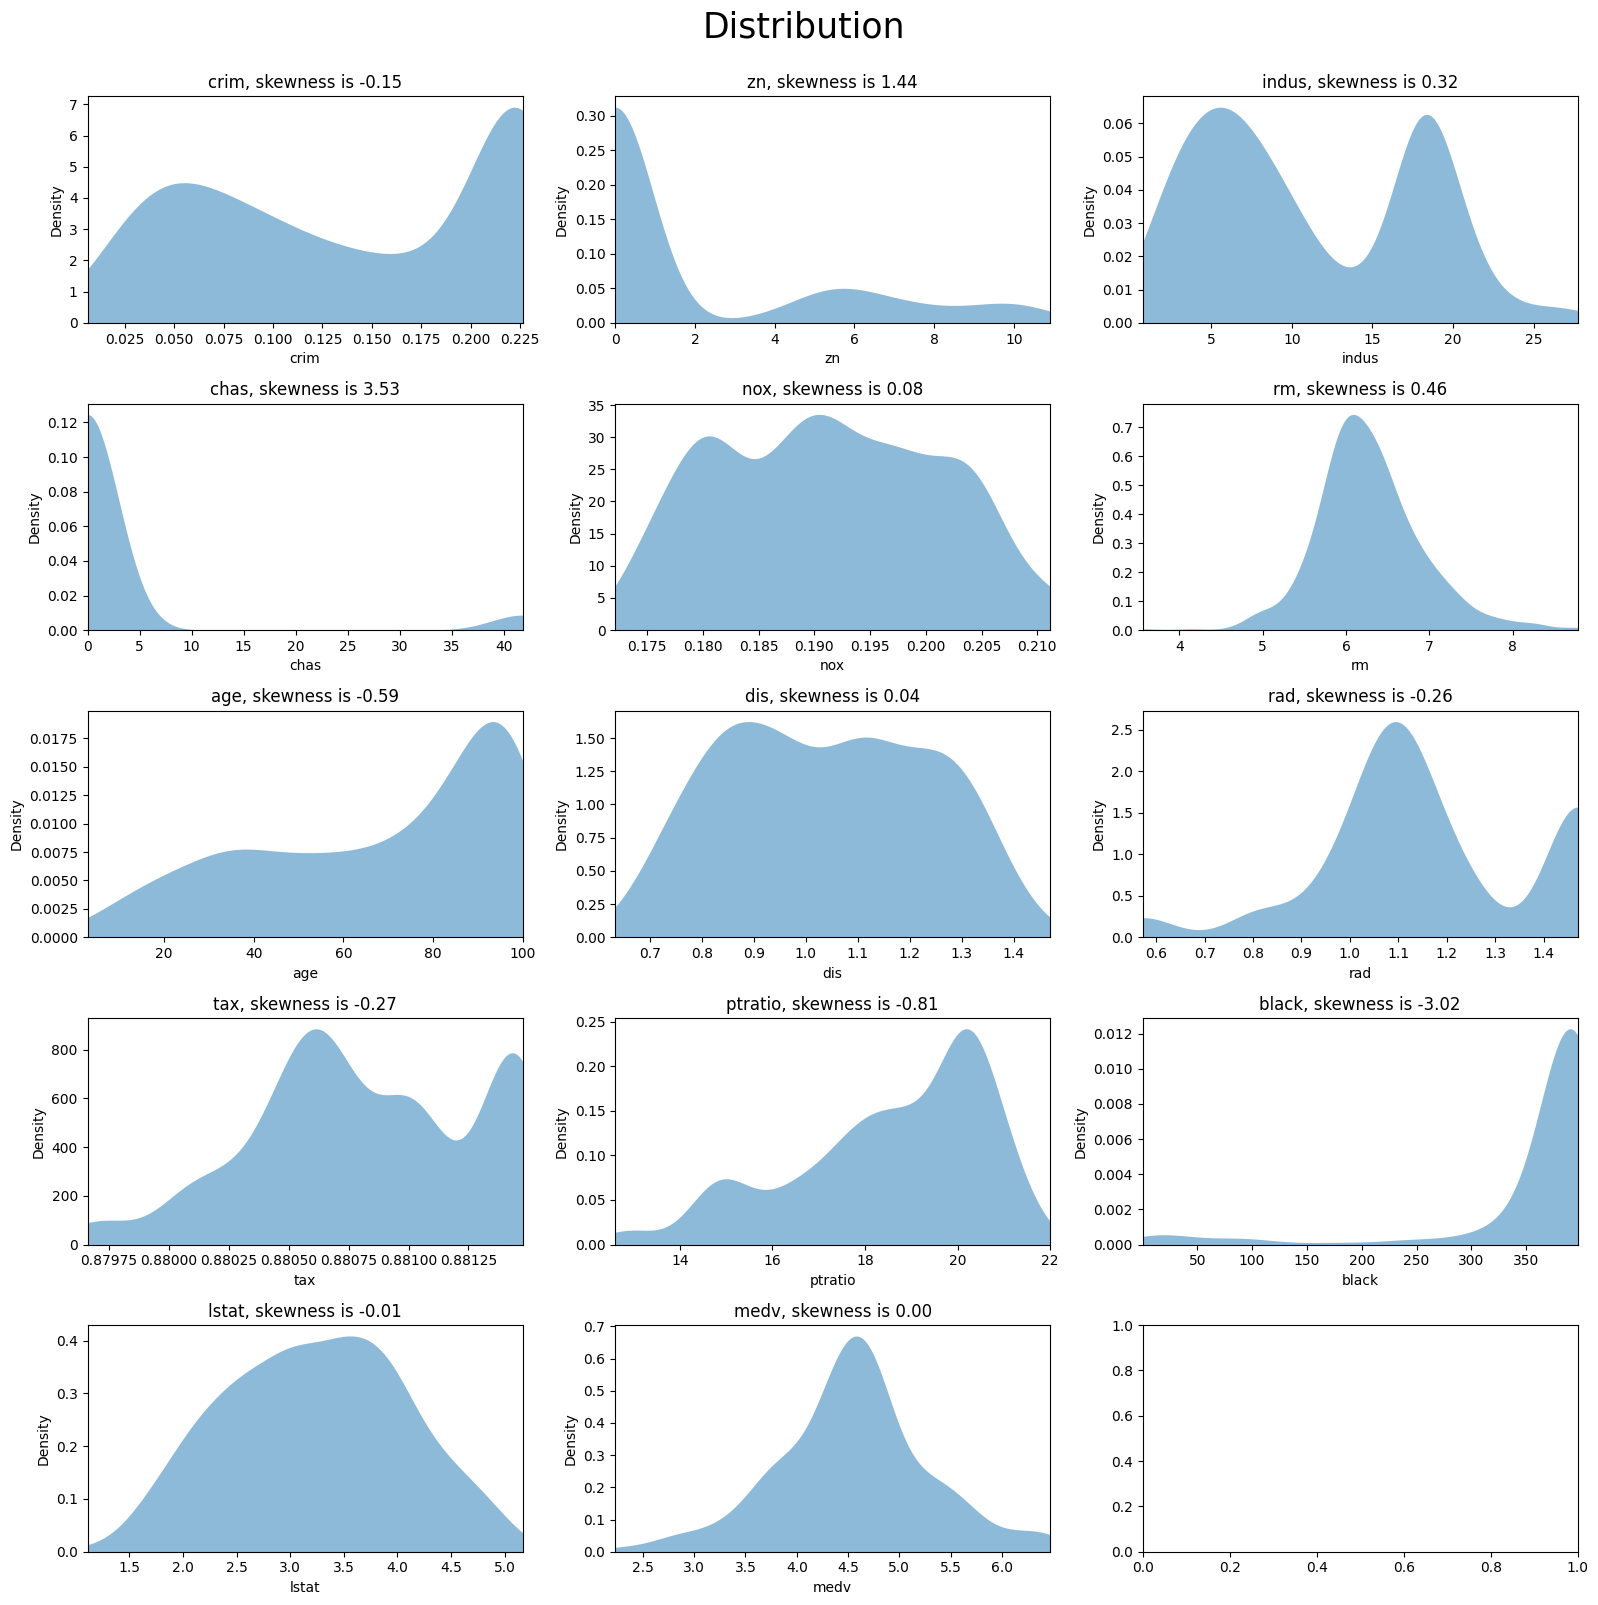

In [13]:

for i in skew_index:
    df[i] = boxcox1p(df[i], boxcox_normmax(df[i] + 1))

fig, axs = distribution(dataset=df, columns_list=columns, rows=5, cols=3, suptitle='Distribution')

### Codificación de variables

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      491 non-null    int64  
 1   crim            491 non-null    float64
 2   zn              491 non-null    float64
 3   indus           491 non-null    float64
 4   chas            491 non-null    float64
 5   nox             491 non-null    float64
 6   rm              491 non-null    float64
 7   age             491 non-null    float64
 8   dis             491 non-null    float64
 9   rad             491 non-null    float64
 10  tax             491 non-null    float64
 11  ptratio         491 non-null    float64
 12  black           491 non-null    float64
 13  lstat           491 non-null    float64
 14  medv            491 non-null    float64
 15  nivel_impuesto  491 non-null    object 
dtypes: float64(14), int64(1), object(1)
memory usage: 61.5+ KB


In [15]:
df = pd.get_dummies(data = df, columns = ['nivel_impuesto'])
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,nivel_impuesto_1,nivel_impuesto_2
0,1,0.006213,4.987625,2.31,0.0,0.191832,6.575,65.2,1.125388,0.572206,0.880604,15.3,396.90,2.138797,4.814595,1,0
1,2,0.025401,0.000000,7.07,0.0,0.184312,6.421,78.9,1.194886,0.815607,0.880250,17.8,396.90,2.926214,4.601835,1,0
2,3,0.025383,0.000000,7.07,0.0,0.184312,7.185,61.1,1.194886,0.815607,0.880250,17.8,392.83,1.897923,5.607383,1,0
3,4,0.029715,0.000000,2.18,0.0,0.182928,6.998,45.8,1.262921,0.957082,0.880072,18.7,394.63,1.571364,5.521706,1,0
4,5,0.057817,0.000000,2.18,0.0,0.182928,7.147,54.2,1.262921,0.957082,0.880072,18.7,396.90,2.219779,5.703326,1,0


### Selección de variables

<Axes: >

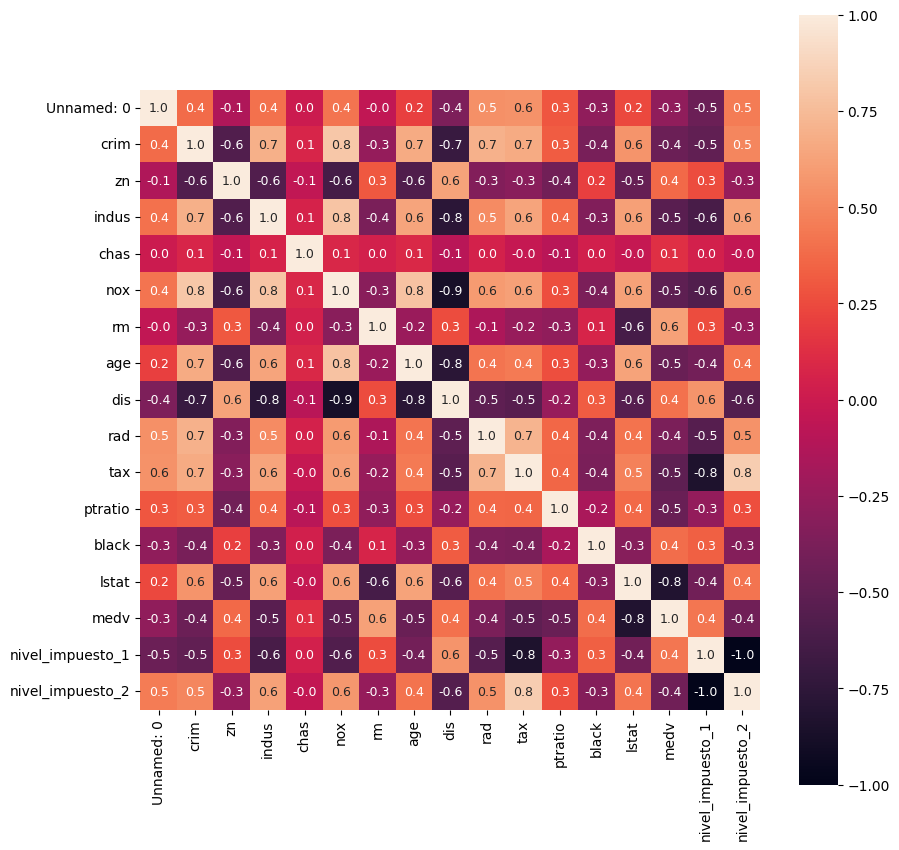

In [16]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':9})

In [17]:
df.drop(['dis'], axis = 1, inplace = True)

## Modelamiento

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('medv', axis=1) 
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Mean Absolute Error (MAE): 0.242
Mean Squared Error (MSE): 0.125
Root Mean Squared Error (RMSE): 0.354


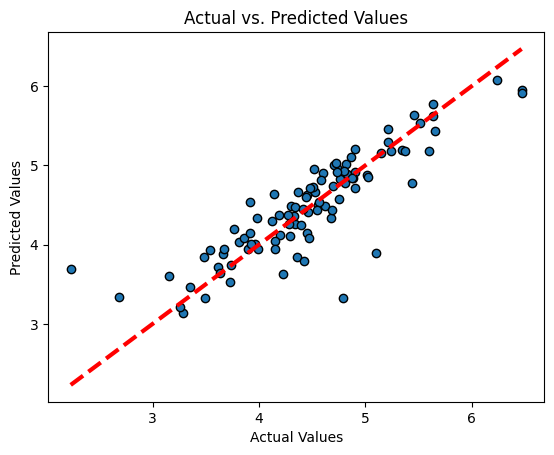

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics



model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")


fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Actual vs. Predicted Values')
plt.show()

Mean Absolute Error (MAE): 0.232
Mean Squared Error (MSE): 0.109
Root Mean Squared Error (RMSE): 0.330


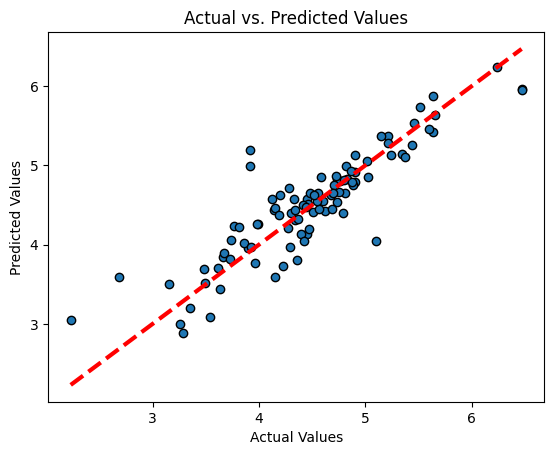

In [22]:
import xgboost as xg

xgboost_regressor = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 100, seed = 27)
xgboost_regressor.fit(X_train, y_train)
y_pred = xgboost_regressor.predict(X_test)


mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")


fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Actual vs. Predicted Values')
plt.show()